<a href="https://colab.research.google.com/github/hhur0104/hh_adv_methods_project/blob/main/Data71200_HH_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 


!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Step 1. Load data & Encode categorical Variable

In [33]:
# Loading data
# Original data source (Kaggle): https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download
stroke = pd.read_csv("https://raw.githubusercontent.com/hhur0104/hh_adv_methods_project/main/healthcare-dataset-stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [34]:
print("=====Work_type: ======\n", stroke["work_type"].value_counts())
print("=====Residence_type: ======\n", stroke["Residence_type"].value_counts())
print("=====smoking_status: ======\n", stroke["smoking_status"].value_counts())

=====Work_type: ======
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
=====Residence_type: ======
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
=====smoking_status: ======
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [35]:
stroke_en = pd.get_dummies(stroke)
print(stroke_en.columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


## STEP 2. Split the data ####

In [36]:
stroke_cln = stroke_en[~stroke_en['bmi'].isna()]
print("Before: ", stroke_en.shape)
print("After: ",stroke_cln.shape)
# Input features
X = stroke_cln.drop(["stroke"], axis=1)
# Label 
y = stroke_cln["stroke"]

for i in stroke_cln.columns :
    print('column ', i,': ' ,stroke_cln[i].isna().sum())

Before:  (5110, 23)
After:  (4909, 23)
column  id :  0
column  age :  0
column  hypertension :  0
column  heart_disease :  0
column  avg_glucose_level :  0
column  bmi :  0
column  stroke :  0
column  gender_Female :  0
column  gender_Male :  0
column  gender_Other :  0
column  ever_married_No :  0
column  ever_married_Yes :  0
column  work_type_Govt_job :  0
column  work_type_Never_worked :  0
column  work_type_Private :  0
column  work_type_Self-employed :  0
column  work_type_children :  0
column  Residence_type_Rural :  0
column  Residence_type_Urban :  0
column  smoking_status_Unknown :  0
column  smoking_status_formerly smoked :  0
column  smoking_status_never smoked :  0
column  smoking_status_smokes :  0


In [37]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

## Step 3. Target Variables
I suspect 'age' will have some impact on label stroke. Also, BMI and avg_glucose_level, so I decided to examine these variables more closely and visualizae the distribution for these variable based on stroke labels.

In [38]:
print(pd.cut(stroke['age'], [0,10, 20, 30, 40, 50, 60, 70, 80], include_lowest=True).value_counts())
print(stroke.loc[stroke['age'] <= 30, 'stroke'].value_counts())

(50.0, 60.0]      823
(40.0, 50.0]      739
(30.0, 40.0]      674
(60.0, 70.0]      594
(70.0, 80.0]      594
(20.0, 30.0]      545
(10.0, 20.0]      518
(-0.001, 10.0]    507
Name: age, dtype: int64
0    1568
1       2
Name: stroke, dtype: int64


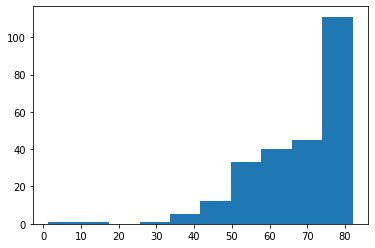

In [39]:
# Distribution of age with strokes
plt.hist(stroke.loc[stroke['stroke']==1, 'age'].values.reshape(-1, 1))
plt.show()

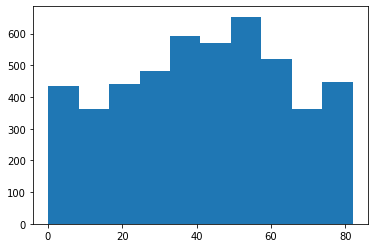

In [40]:
# Distribution of age with no strokes
plt.hist(stroke.loc[stroke['stroke']==0, 'age'].values.reshape(-1, 1))
plt.show()

From the bar graphs, I see that majority of stroke samples are older patients. Since the dataset is very imbalanced, it has large number of no storke patients and small number of stroke patients, I am going to get rid of all samples younger than the age of 30 since there are only two stroke out of 1568 samples in that age group. 

In [41]:
stroke = stroke.drop(stroke[stroke['age'] <= 30].index)

The same way I examined the age between stroke patient and healthy, I will also visualize whether there are difference in distribution in features heart disease and bmi.

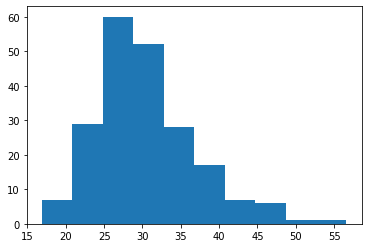

In [42]:
# Distribution of age with strokes
plt.hist(stroke.loc[stroke['stroke']==1, 'bmi'].values.reshape(-1, 1))
plt.show()

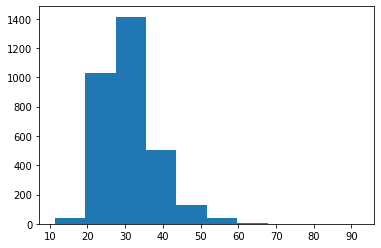

In [43]:
# Distribution of age with no strokes
plt.hist(stroke.loc[stroke['stroke']==0, 'bmi'].values.reshape(-1, 1))
plt.show()

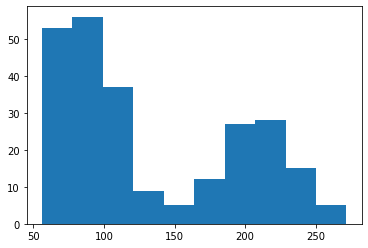

In [44]:
# Distribution of age with strokes
plt.hist(stroke.loc[stroke['stroke']==1, 'avg_glucose_level'].values.reshape(-1, 1))
plt.show()

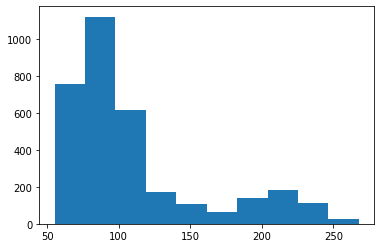

In [45]:
# Distribution of age with no strokes
plt.hist(stroke.loc[stroke['stroke']==0, 'avg_glucose_level'].values.reshape(-1, 1))
plt.show()

0    0.809717
1    0.190283
Name: heart_disease, dtype: float64
0    0.931066
1    0.068934
Name: heart_disease, dtype: float64


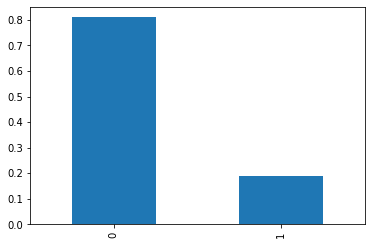

In [46]:
# Distribution of heart_disease with strokes
print(stroke.loc[stroke['stroke']==1, 'heart_disease'].value_counts(normalize=True))
print(stroke.loc[stroke['stroke']==0, 'heart_disease'].value_counts(normalize=True))

stroke.loc[stroke['stroke']==1, 'heart_disease'].value_counts(normalize=True).plot(kind='bar')

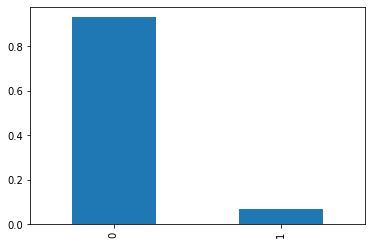

In [47]:
stroke.loc[stroke['stroke']==0, 'heart_disease'].value_counts(normalize=True).plot(kind='bar')

0    0.732794
1    0.267206
Name: hypertension, dtype: float64
0    0.872153
1    0.127847
Name: hypertension, dtype: float64


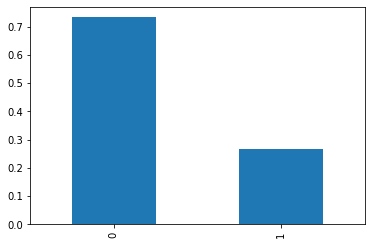

In [48]:
# Distribution of heart_disease with strokes
print(stroke.loc[stroke['stroke']==1, 'hypertension'].value_counts(normalize=True))
print(stroke.loc[stroke['stroke']==0, 'hypertension'].value_counts(normalize=True))

stroke.loc[stroke['stroke']==1, 'hypertension'].value_counts(normalize=True).plot(kind='bar')

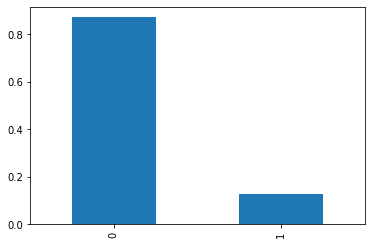

In [49]:
stroke.loc[stroke['stroke']==0, 'hypertension'].value_counts(normalize=True).plot(kind='bar')

It looks like avg_glucose_level do not really differentiate between stroke and no stroke. But the percentage of hypertension or heart_disease show some difference between the two groups. So, these features will be used to model stroke.

In [50]:
print(X.columns)

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [51]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

In [52]:
X_train = X_train[['hypertension','heart_disease','age','bmi']]
X_test = X_test[['hypertension','heart_disease','age','bmi']]

## Step 4 & 5. Logistic Regression with L1 Regularization and default parameters


In [53]:
# Running with Cross validation with default parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

log_L1 = LogisticRegression(random_state=1, penalty="l1", solver='liblinear')

cv_5 = cross_val_score(log_L1, X_train, y_train, cv=5)

print("cv_scores:\n{}".format(cv_5))
print("cv_scores mean:\n{}".format(np.mean(cv_5)))

log_L1.fit(X_train, y_train)
print("Training accuracy of logreg with default params: {:.2f}".format(
           log_L1.score(X_train, y_train)))
print("Test accuracy of logreg with default params: {:.2f}".format(
           log_L1.score(X_test, y_test)))

cv_scores:
[0.956743   0.956743   0.95796178 0.95796178 0.95796178]
cv_scores mean:
0.9574742710815058
Training accuracy of logreg with default params: 0.96
Test accuracy of logreg with default params: 0.96


In [54]:
print("Number of 1: ", list(y_test.values).count(1))
print("Number of 0: ", list(y_test.values).count(0))
print(y_test.values)

Number of 1:  42
Number of 0:  940
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

In [55]:
y_pred = log_L1.predict(X_test)
print("Number of 0: ", list(y_pred).count(0))
print("Number of 1: ", list(y_pred).count(1))
print(y_pred)
print(classification_report(y_test, y_pred))

Number of 0:  982
Number of 1:  0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


There is no stroke predicted in y_pred with label 1. The model predicted all test samples to be 0. Which is not precise at all. New trial with grid search.

## Step 4 & 5. Logistic Regression with GridSearchCV

In [56]:
# LogisticRegression with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#dictionary of all values of k
log_L1_gs = LogisticRegression(random_state=1, penalty="l1", solver='liblinear')
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#grid search on all values of k in dictionary
logreg_gscv = GridSearchCV(log_L1_gs, param_grid, cv=5)
logreg_gscv.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (logreg_gscv.best_params_, logreg_gscv.best_score_))

The best parameters are {'C': 0.001} with a score of 0.96


In [57]:
# C=0.001
log_L1_gs = LogisticRegression(random_state=1, penalty="l1", solver='liblinear', C=0.001)
log_L1_gs.fit(X_train, y_train)
y_pred_gs = log_L1_gs.predict(X_test)
print(y_pred_gs)

print("Test set R^2: {:.2f}".format(log_L1_gs.score(X_test, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, y_pred_gs)))
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test, y_pred_gs)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [58]:
# C=100
log_L1_gs = LogisticRegression(random_state=1, penalty="l1", solver='liblinear', C=100)
log_L1_gs.fit(X_train, y_train)
y_pred_gs = log_L1_gs.predict(X_test)
print(y_pred_gs)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Test set R^2: {:.2f}".format(log_L1_gs.score(X_test, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, y_pred_gs)))
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test, y_pred_gs)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

The logistic regression is not working well to predict any stroke patients in 
the data. Both parameter settings produce same results it can only label 0s but no 1s.

## Step 4 & 5 Random Forest with default parameter

In [59]:
# Running with Cross validation with default parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

forest = RandomForestClassifier(n_estimators=5, random_state=1)

cv_5 = cross_val_score(forest, X_train, y_train, cv=5)

print("cv_scores:\n{}".format(cv_5))
print("cv_scores mean:\n{}".format(np.mean(cv_5)))

forest.fit(X_train, y_train)
print("Training accuracy of logreg with default params: {:.2f}".format(
           forest.score(X_train, y_train)))
print("Test accuracy of logreg with default params: {:.2f}".format(
           forest.score(X_test, y_test)))

cv_scores:
[0.92493639 0.93256997 0.94649682 0.94140127 0.9388535 ]
cv_scores mean:
0.9368515907359687
Training accuracy of logreg with default params: 0.98
Test accuracy of logreg with default params: 0.94


In [60]:
print(X_test)

      hypertension  heart_disease    age   bmi
3596             0              0  37.00  33.0
4450             0              0  59.00  25.6
1538             0              0  54.00  35.8
1425             0              0  17.00  43.0
2569             0              0  59.00  43.4
...            ...            ...    ...   ...
4612             0              0  30.00  25.5
2194             0              0   1.72  18.5
488              0              0  42.00  25.0
2378             0              0  47.00  30.1
1054             0              0  76.00  40.9

[982 rows x 4 columns]


In [61]:
print("Number of 1: ", list(y_test.values).count(1))
print("Number of 0: ", list(y_test.values).count(0))
print(y_test.values)


Number of 1:  42
Number of 0:  940
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

In [62]:
y_pred = forest.predict(X_test)
print("Number of 0: ", list(y_pred).count(0))
print("Number of 1: ", list(y_pred).count(1))
print(y_pred)
print(classification_report(y_test, y_pred))

Number of 0:  960
Number of 1:  22
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Step 4 & 5. Random Forest with GridSearchCV

In [63]:
print("Feature importances:")
print(forest.feature_importances_)

Feature importances:
[0.03148209 0.0285288  0.33928526 0.60070385]


In [64]:
# RandomForest with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#dictionary of all values of k
forest = RandomForestClassifier(random_state=1)
param_grid = {"n_estimators": [5, 7, 10, 12, 15, 17, 20, 25]}

#grid search on all values of k in dictionary
forest_gscv = GridSearchCV(forest, param_grid, cv=5)
forest_gscv.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (forest_gscv.best_params_, forest_gscv.best_score_))

The best parameters are {'n_estimators': 20} with a score of 0.94


In [65]:
# n_estimators
forest_gs = RandomForestClassifier(random_state=1, n_estimators=20)
forest_gs.fit(X_train, y_train)
y_pred_gs = forest_gs.predict(X_test)

print("Number of 0: ", list(y_pred_gs).count(0))
print("Number of 1: ", list(y_pred_gs).count(1))
print(y_pred_gs)
print(classification_report(y_test, y_pred_gs))

print("Test set R^2: {:.2f}".format(forest_gs.score(X_test, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, y_pred_gs)))
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test, y_pred_gs)))

Number of 0:  965
Number of 1:  17
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [66]:
# C=5
forest_gs = RandomForestClassifier(random_state=1, n_estimators=5)
forest_gs.fit(X_train, y_train)
y_pred_gs = forest_gs.predict(X_test)

print("Number of 0: ", list(y_pred_gs).count(0))
print("Number of 1: ", list(y_pred_gs).count(1))
print(y_pred_gs)
print(classification_report(y_test, y_pred_gs))

print("Test set R^2: {:.2f}".format(forest_gs.score(X_test, y_test)))
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, y_pred_gs)))
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test, y_pred_gs)))

Number of 0:  960
Number of 1:  22
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

The random forest model is performing better than logistic regression, but the model is still far away from correctly labeling stroke patients. I need to look for other ways to improve the models.